<a href="https://colab.research.google.com/github/fred-carneiro/bootcamp-alura/blob/main/AnaliseVacina%C3%A7%C3%A3oNoDF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto do Modulo 1

Neste notebook vou analisar os dados referentes à vacinação para o COVID da população do DF. Para isso, estou utilizando os dados coletados no site https://opendatasus.saude.gov.br/dataset/covid-19-vacinacao/resource/ef3bd0b8-b605-474b-9ae5-c97390c197a8?inner_span=True no dia 29/05/2021, com os dados atualizados até o dia 28/05/2021.

Para poder entender melhor os dados, existe o dicionário de dados deste mesmo site. Vou colar um print aqui para melhor visualização.

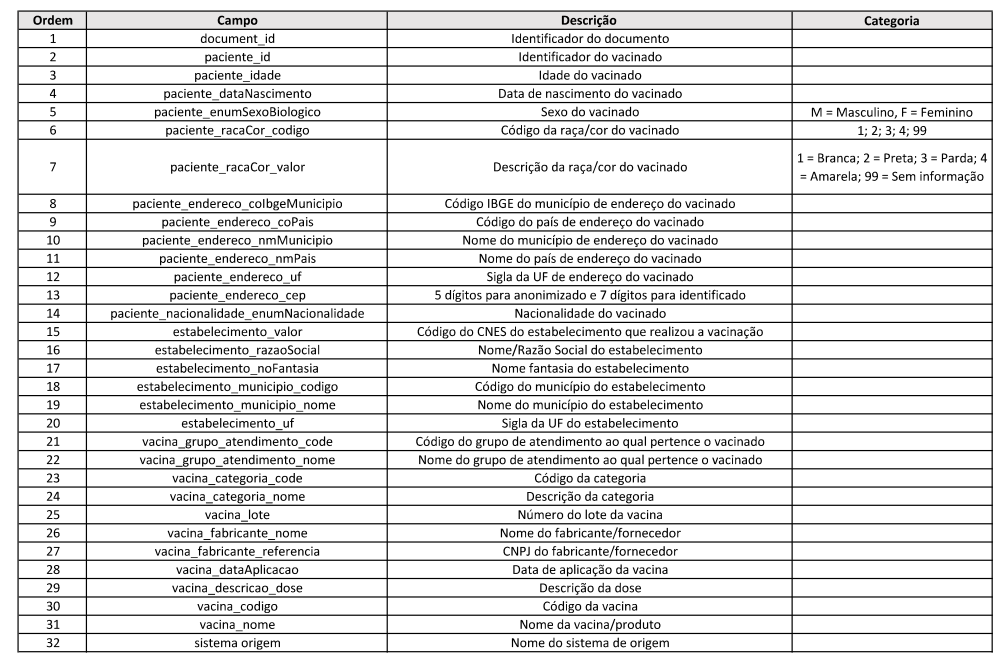

In [101]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

dados = pd.read_csv("/content/drive/MyDrive/BootcampAlura/Projeto 1/vacinacao_covid_df.csv", sep=";")
dados.head()

,document_id,paciente_id,paciente_idade,paciente_datanascimento,paciente_enumsexobiologico,paciente_racacor_codigo,paciente_racacor_valor,paciente_endereco_coibgemunicipio,paciente_endereco_copais,paciente_endereco_nmmunicipio,paciente_endereco_nmpais,paciente_endereco_uf,paciente_endereco_cep,paciente_nacionalidade_enumnacionalidade,estabelecimento_valor,estabelecimento_razaosocial,estalecimento_nofantasia,estabelecimento_municipio_codigo,estabelecimento_municipio_nome,estabelecimento_uf,vacina_grupoatendimento_codigo,vacina_grupoatendimento_nome,vacina_categoria_codigo,vacina_categoria_nome,vacina_lote,vacina_fabricante_nome,vacina_fabricante_referencia,vacina_dataaplicacao,vacina_descricao_dose,vacina_codigo,vacina_nome,sistema_origem,data_importacao_rnds,id_sistema_origem
0,2639c662-401e-471a-989a-159791e498c2-i0b0,39d7cb895b634027b1ce2466d7db990be9b13193a319c0...,46,1974-11-27,F,99,SEM INFORMACAO,530010.0,10.0,BRASILIA,BRASIL,DF,71939.0,B,9056963,UNIDADE BASICA DE SAUDE N 01 DE VICENTE PIRES,UBS 01 VICENTE PIRES,530010,BRASILIA,DF,104,Pneumopatias Crônicas Graves,1.0,Comorbidades,210213,FUNDACAO BUTANTAN,Organization/61189445000156,2021-05-23,1ª Dose,86,Covid-19-Coronavac-Sinovac/Butantan,Novo PNI,2021-05-23T15:01:20.000Z,NaN
1,001ce155-7a49-4e27-b05b-f9938ae9dd35-i0b0,1fa58e38a0c52c1fc9678ee6e597a98e03e4dd70f1397e...,47,1973-07-01,F,99,SEM INFORMACAO,530010.0,10.0,BRASILIA,BRASIL,DF,71615.0,B,9578277,GERENCIA DE SERVICOS DE ATENCAO SECUNDARIA 3,POLICLINICA LAGO SUL,530010,BRASILIA,DF,919,Psicólogo,9.0,Trabalhadores de Saúde,210087,FUNDACAO BUTANTAN,Organization/61189445000156,2021-03-26,1ª Dose,86,Covid-19-Coronavac-Sinovac/Butantan,Novo PNI,2021-04-05T15:50:40.000Z,NaN
2,3be29250-c085-4356-aa01-9b150101a6fd-i0b0,5ef1e9d425ca69c4799b971209a07a9c1de2290e97f708...,61,1960-04-28,M,99,SEM INFORMACAO,530010.0,10.0,BRASILIA,BRASIL,DF,NaN,B,9056963,UNIDADE BASICA DE SAUDE N 01 DE VICENTE PIRES,UBS 01 VICENTE PIRES,530010,BRASILIA,DF,201,Pessoas de 60 a 64 anos,2.0,Faixa Etária,213VCD021W,FUNDACAO OSWALDO CRUZ,Organization/33781055000135,2021-05-01,1ª Dose,85,Vacina Covid-19 - Covishield,Novo PNI,2021-05-23T13:51:53.000Z,NaN
3,d6ae7061-cc4c-4cbd-87b3-92986145e306-i0b0,e0693f1db44659a34641f22e6438e9b0ab01e0d569a4b4...,45,1975-09-22,F,4,AMARELA,530010.0,10.0,BRASILIA,BRASIL,DF,NaN,B,11150,UNIDADE BASICA DE SAUDE N 1 ASA SUL,UBS 01 ASA SUL,530010,BRASILIA,DF,923,Técnico de Enfermagem,9.0,Trabalhadores de Saúde,210013,FUNDACAO BUTANTAN,Organization/61189445000156,2021-02-25,1ª Dose,86,Covid-19-Coronavac-Sinovac/Butantan,Novo PNI,2021-02-25T15:04:53.000Z,NaN
4,3319fcb8-eaea-48aa-a84b-bbeb280c2d55-i0b0,0e34b8ad90c5d8fa526dc6beaf2d8958c6fd8152d190c6...,39,1981-11-15,M,99,SEM INFORMACAO,530010.0,10.0,BRASILIA,BRASIL,DF,71901.0,B,9056963,UNIDADE BASICA DE SAUDE N 01 DE VICENTE PIRES,UBS 01 VICENTE PIRES,530010,BRASILIA,DF,109,Obesidade Grave (Imc>=40),1.0,Comorbidades,210213,FUNDACAO BUTANTAN,Organization/61189445000156,2021-05-23,1ª Dose,86,Covid-19-Coronavac-Sinovac/Butantan,Novo PNI,2021-05-23T14:49:55.000Z,NaN


Dando uma olhada nos dados de vacinação, podemos fazer algumas explorações nesses dados.

In [103]:
dados['vacina_nome'].value_counts()

Covid-19-Coronavac-Sinovac/Butantan                          506892
Vacina Covid-19 - Covishield                                 288261
Covid-19-AstraZeneca                                          25956
Vacina covid-19 - BNT162b2 - BioNTech/Fosun Pharma/Pfizer     15682
Name: vacina_nome, dtype: int64

A tabela acima mostra a quantidade de vacinas aplicadas por tipo de vacina. Chama a atenção a informação da vacina "*Vacina Covid-19 - Covishield*" que segundo o site https://saude.abril.com.br/medicina/tudo-sobre-as-vacinas-contra-a-covid-19-sendo-aplicadas-no-brasil/ é a mesma da AstraZeneca, podendo essas quantidades serem agrupadas.

In [104]:
dados["vacina_nome"] = dados["vacina_nome"].replace("Vacina Covid-19 - Covishield", "Covid-19-AstraZeneca") #agrupando tanto a Covishield
dados['vacina_nome'].value_counts()

Covid-19-Coronavac-Sinovac/Butantan                          506892
Covid-19-AstraZeneca                                         314217
Vacina covid-19 - BNT162b2 - BioNTech/Fosun Pharma/Pfizer     15682
Name: vacina_nome, dtype: int64

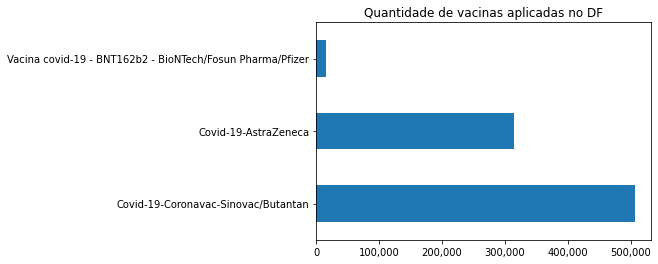

In [105]:
ax = dados['vacina_nome'].value_counts().plot(kind="barh", x="Quantidade por vacina", y="Vacinas aplicadas")
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
plt.title("Quantidade de vacinas aplicadas no DF")
plt.show()

Nesse gráfico podemos ver que até o momento, as vacinas mais usadas no DF foram as Coronavac e AstraZeneca, com o início do uso das vacinas da Pfizer recentemente.

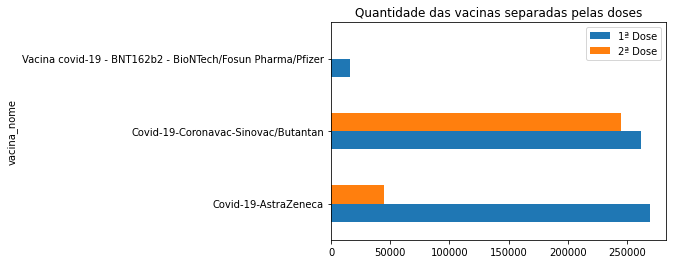

In [115]:
ax = dados.groupby(['vacina_nome','vacina_descricao_dose']) \
  .size().unstack().plot(kind="barh")
ax.set_title("Quantidade das vacinas separadas pelas doses")
ax.legend(["1ª Dose", "2ª Dose"])

Nesse gráfico conseguimos ver que no DF temos uma alta relação de pessoas que voltaram para tomar a segunda dose da Coronavac. 

A segunda dose da AstraZeneca tem uma proporção menor, mas como a distância entre as doses é maior (3 semanas da Coronavac e 3 meses da AstraZeneca) os dados parecem fazer sentido.

In [107]:
dados['paciente_endereco_uf'].value_counts().head()

DF    714545
GO     53611
MG     13531
SP      7153
RJ      6669
Name: paciente_endereco_uf, dtype: int64